## 4. 数据可视化基础

### 0. Introduction

一图胜千言，在数据分析的过程中，数据可视化为我们提供了对于数据的直观感受，是数据分析的重要步骤之一。本章主要向大家介绍一些常用的python数据可视化方法，以及常用的python可视化库。

本章主要介绍`matplotlib`，`ploty`，两个python的可视化库。Python中拥有许多的可供我们选择的数据可视化库，但是`matplotlib`已然称为一个标杆，他是当今最流行也是最好用的数据可视化包，对于标准的画图工作`matplotlib`提供了易于理解的接口；而在面对复杂的绘图或者自定义样式时，它又具有很好的灵活性；此外`matplotlib`对于`numpy`与`pandas`的对象紧密集成，对其所定义的数据对象提供了良好的兼容性。

`matplotlib`只能生成位图形式的图表，而像例如基于数据驱动文档（D3.js）标准的技术的现代Web技术则可以生成很好的交互式可嵌入的图表。`plotly`库就是一个可以使我们便利的创建D3.js图表的库，而`cufflinks`则为其提供了与`Dataframe`对象紧密结合的程序接口，是我们可以快速的创建各类可交互的图表。

本章主要包含以下内容：
1. 静态2D绘图：主要介绍`matplotlib`，以及如何使用其进行一些常见的2D图表绘制。
2. 静态3D绘图：主要介绍使用`matplotlib`进行3D图表的绘制。
3. 交互式2D图表绘制：主要介绍使用`plotly`与`cufflinks`的交互式图表绘制。

### 1. Matplotlib二维绘图

#### 1.1 导入matplotlib绘图库

在开始之前，我们首先将matplotlib库导入，并进行一些设置。

In [3]:
import matplotlib as mpl  # 导入matplotlib库

In [4]:
mpl.__version__  # 查看matplotlib版本

'3.8.2'

In [5]:
import matplotlib.pyplot as plt  # 导入主绘图子库

plt.style.use('seaborn-v0_8')  # 设置绘图风格样式为seaborn
mpl.rcParams['font.family'] = 'serif'  # 设置图表中显示的字体为serif

In [6]:
plt.style.available  # 查看可用的图表样式

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

#### 1.2 一维数据集的可视化

pyplot是matplotlib中用来绘图的主要子库，在pyplot子库中`plot`函数是最基础的绘图函数。一般的，`plot`需要两个参数——`x`和`y`，分别代表着x坐标轴/横坐标轴的数据以及y坐标轴/纵坐标轴的数据（通常以列表或数组的形式传入），其中传入`x`与`y`，的数据的数量必须是相等的。

接下来，我们来使用`plot`函数对一列一维的数据进行绘图：

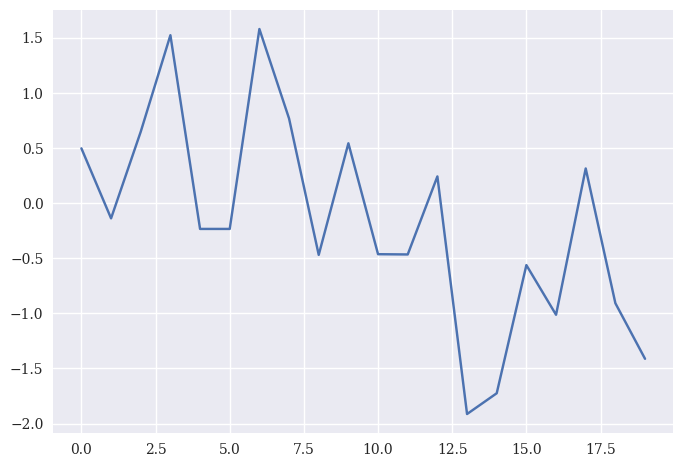

In [7]:
import numpy as np

np.random.seed(42) # 设置随机数种子，方便复现

y = np.random.standard_normal(20) # 生成正态的数据
x = np.arange(len(y))

plt.plot(x, y) # 绘图

在上面的代码中，我们使用`np.random.seed()`设置了固定的随机数种子，以保证我们生成的随机数序列是一致的，保证了我们结果的可复现。然后使用`np.random.standard_normal()`方法，随机生成了20个符合正态分布的数据点，最后使用`plot`函数进行绘图。

`plt.plot()`方法会自动判断传入的数据结构，当我们传入的是`ndarray`对象的情况下，我们可以不必传入x，`plt.plot()`会自动将`ndarray`对象识别为提供的y值，并以数组的索引作为x值，因此我们可以通过以下的方法获得一致的结果。

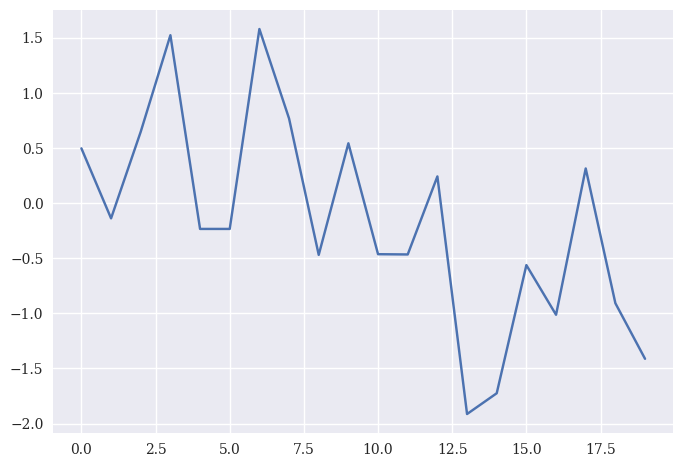

In [8]:
plt.plot(y)

#### 1.3 Matplotlib自定义绘图样式

以上我们就完成了最基本的matplotlib绘图过程。但是，一般来说matplotlib的默认绘图样式无法满足我们在论文、报表、出版等的要求，因此在大部分的情况下我们都需要对matplotlib的绘图样式进行自定义，来满足我们对于特定图表格式的要求，例如：设定字体以兼容Latex、设定标签、设定网格等。接下来，为大家简单介绍一下自定义matplotlib绘图样式的方法。Matplotlib为我们提供了大量的方法以满足我们对于图表样式的需求。

##### 1.3.1 为图像添加标题与标签

我们可以使用`plt.title`以及`plt.xlabel`、`plt.ylabel`方法来分别为我们的图表添加标题并对应的为x轴与y轴添加对其数据的说明的标签。

Text(0, 0.5, 'y')

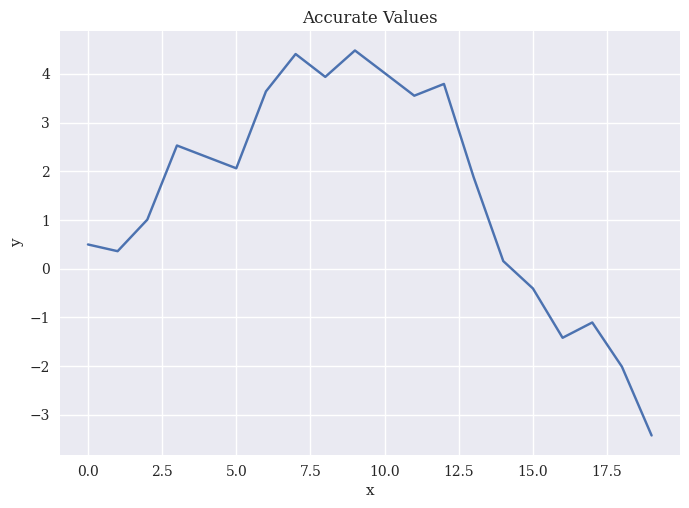

In [9]:
plt.plot(y.cumsum())
plt.title('Accurate Values')
plt.xlabel('x')
plt.ylabel('y')

我们可以使用`plt.legend`方法来为我们的图像添加图例，在`plt.plot`中通过传入`label`参数指定我们的图例，在有多列数据或在一张图中展示多条数据曲线的情况下非常有必要。

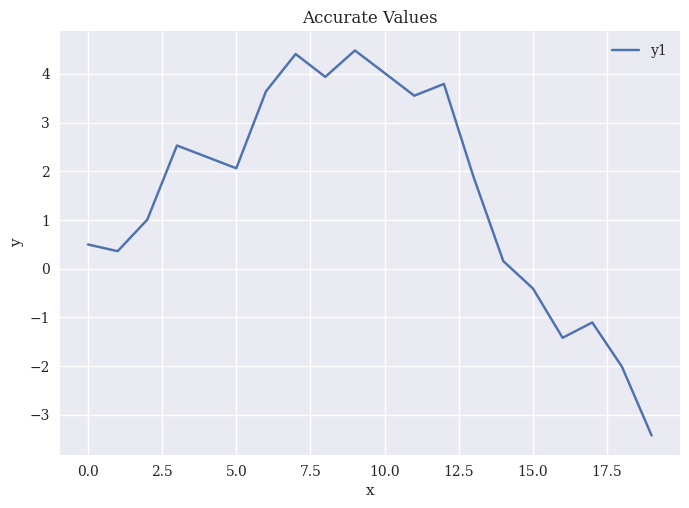

In [10]:
plt.plot(y.cumsum(), label='y1')
plt.title('Accurate Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

`plt.legend`可以传入一个位置参数`loc`来指定图例在图中显示的位置，默认值为1，即默认的图例显示位置在右上角；
 
- 默认：右上角
- 0：自动寻找最佳位置，对数据曲线遮挡最小
- 1：右上
- 2：左上
- 3：左下
- 4：右下
- 5：右侧
- 6：左侧居中
- 7：右侧居中
- 8：下方居中
- 9：上方居中
- 10：居中

##### 1.3.2 操纵坐标轴

在一些情况下，我们为了让图像的数据显示的更加合理，方便我们对数据的一些特征进行观察，我们通常需要对图像的坐标轴进行一些设定，例如为了显示出全部的数据使其不超过图像画布的范围，我们通常需要设定坐标轴的最大值与最小值。

matplotlib为我们提供了`plt.aixs`方法来让我们对于坐标轴进行一些设定，我们可以为起初如一些列参数来设定坐标轴：

- `'Empty'`：返回当前坐标轴限值
- `'off'`：关闭坐标轴线与标签
- `'equal'`：使用等刻度
- `'scaled'`：通过尺度变化平衡刻度
- `'tight'`：使所有数据可见（缩小限值）
- `'image'`：使所有数据可见（使用数据限值）
- `'[xmin, xmax, ymin, ymax]'`：将设置限制为给定的一组值

(-0.9500000000000001, 19.95, -3.821300346127786, 4.875940234278769)

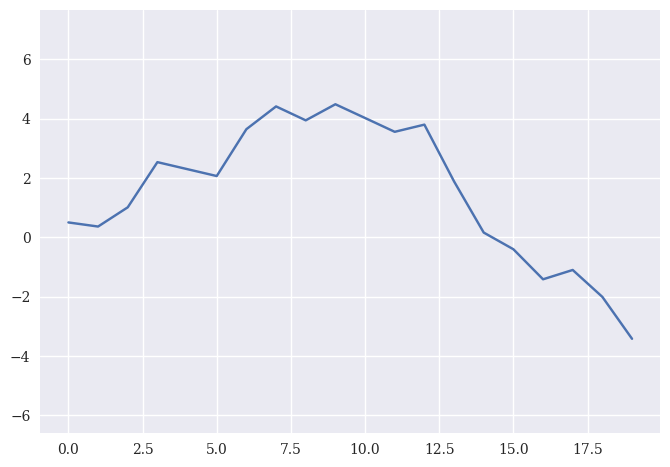

In [11]:
plt.plot(y.cumsum())
plt.axis('equal')

除了`plt.axis`外，我们还可以使用`plt.xlim`、`plt.ylim`来设置每个坐标轴的最大值与最小值

(-4.425971228836579, 5.4806111169875615)

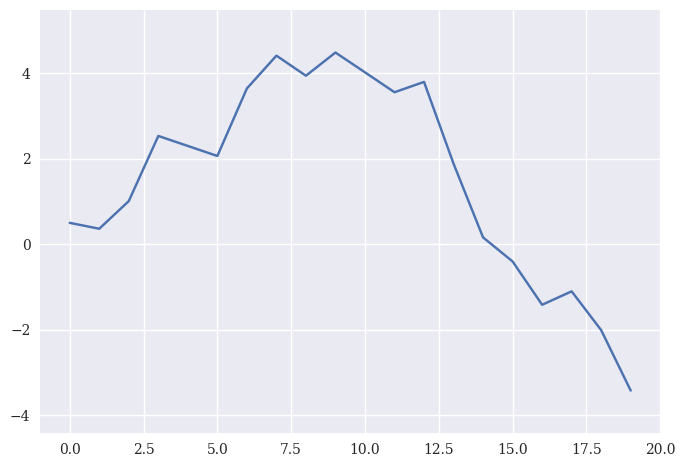

In [12]:
plt.plot(y.cumsum())
plt.xlim(-1, 20)
plt.ylim(
    np.min(y.cumsum()) - 1,
    np.max(y.cumsum()) + 1
)

##### 1.3.3 背景/网格与数据曲线样式设置

在matplotlib中，我们可以增加网格来使我们的图像更易理解，matplotlib提供了`plt.grid`方法来进行此项操作。传入`False`即关闭背景网格，`True`即开启背景网格。

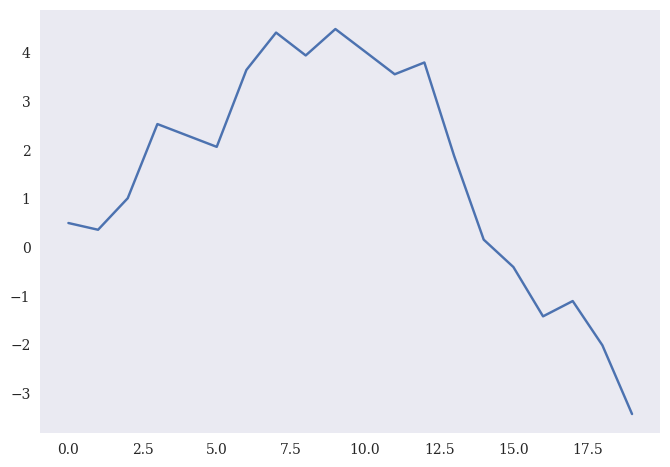

In [13]:
plt.plot(y.cumsum())
plt.grid(False)

在matplotlib中，即使是离散的点也会被自动连接成曲线，我们可以设置数据点的样式以及线条的样式来显示离散的点。我们可以通过直接在`plt.plot`中传入颜色与标准样式字符来进行设定：

标准颜色缩写：

- 'b'：蓝
- 'g'：绿
- 'r'：红
- 'c'：青
- 'm'：品红
- 'y'：黄
- 'k'：黑
- 'w'：白

标准样式字符：

- '-'：实线样式
- '--'：短划线样式
- '-.'：点实线样式
- ':'：虚线样式
- '.'：点标记
- ','：像素标记
- 'o'：圆标记
- 'v'：向下三角标记
- '^'：向上三角标记
- '<'：向左三角标记
- '>'：向右三角标记
- 1：Tri_down标记
- 2：Tri_up标记
- 3：Tri_left标记
- 4：Tri_right标记
- 's'：方形标记
- 'p'：五边形标记
- '*'：星号
- 'h'：六边形标记1
- 'H'：六边形标记2
- '+'：加号
- 'x'：X标记
- 'D'：菱形标记
- 'd'：细菱形标记
- '|'：垂直线标记
- '_'：水平线标记

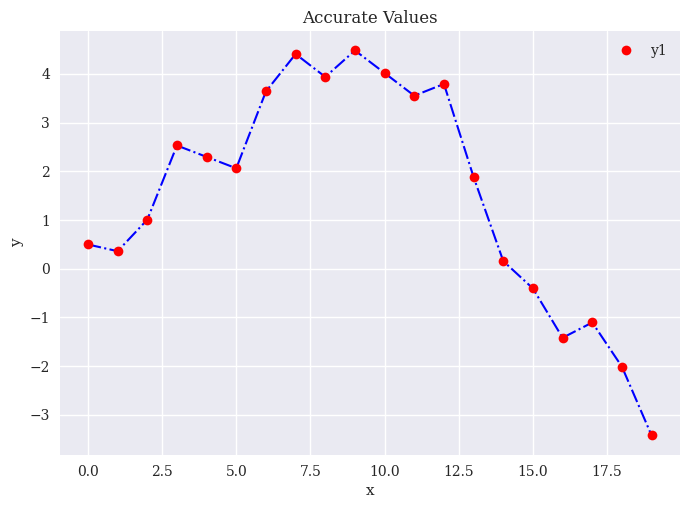

In [14]:
plt.plot(y.cumsum(), 'b-.', lw=1.5)
plt.plot(y.cumsum(), 'ro', lw=1.5, label='y1')
plt.title('Accurate Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

##### 1.3.4 设置图像大小

我们可以通过`plt.figure`的`figsize`参数来控制图像的大小比例，该参数传入一个用来表示图像大小的元组。

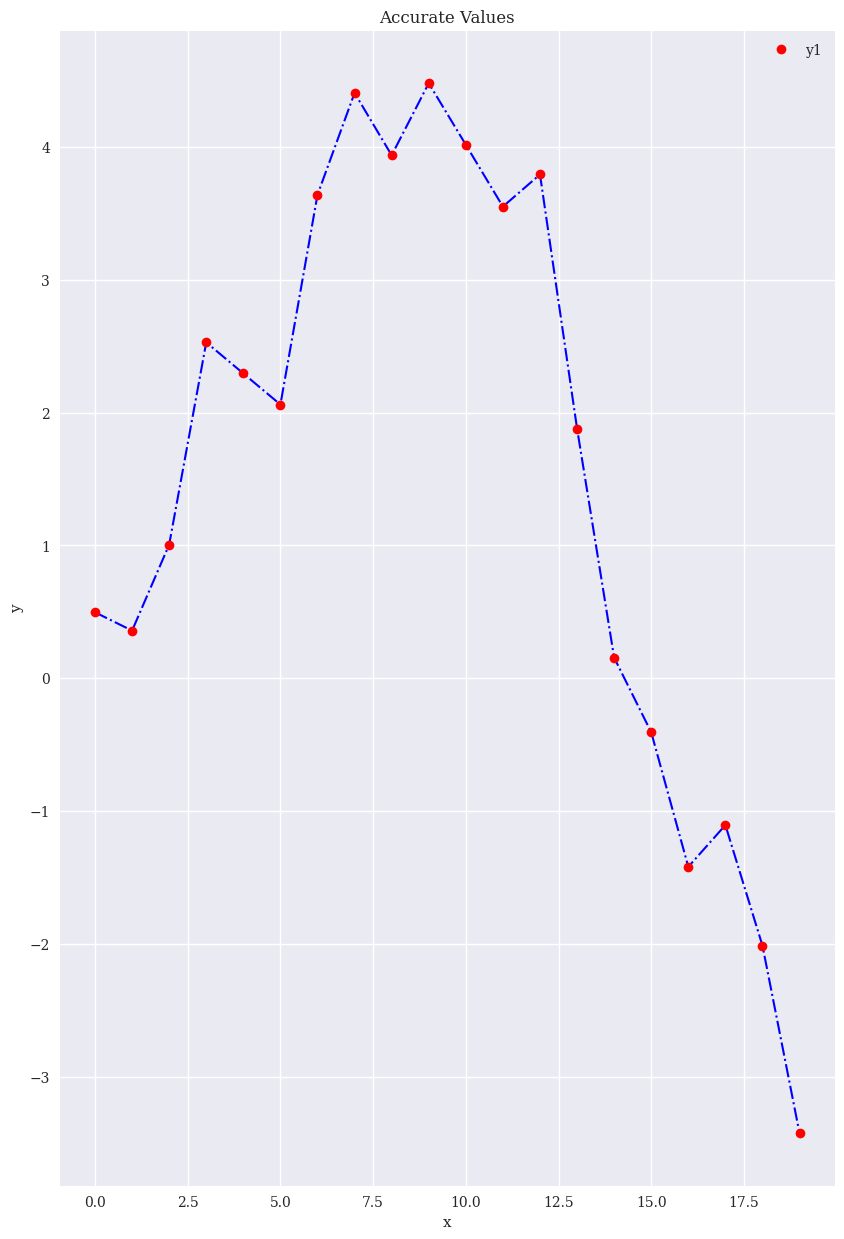

In [15]:
plt.figure(figsize=(10, 15))
plt.plot(y.cumsum(), 'b-.', lw=1.5)
plt.plot(y.cumsum(), 'ro', lw=1.5, label='y1')
plt.title('Accurate Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#### 1.4 二维数据可视化

一般来说，我们在分析一个数据集时，该数据集通常含有多列数据，绘制一维数据的可视化可以看作一般情况的一种特例。在同时显示多维数据时，我峨嵋你会遇到一些问题，比如，数据的测度不同，无法使用相同的x轴或y轴进行刻画，或者我们可能会希望以不同的形式来显示不同的数据，比如对于第一列数据我们可能希望以折线图来显示，而对于第二列数据我们就可能希望以直方图的形式来展示。面对这种情况matplotlib依然为我们提供了许多方便快捷的方法来进行可视化。

首先我们先定义这样的一组二维数据。

In [16]:
y = np.random.standard_normal((20, 2)).cumsum(axis=0)
y[:, 0] = y[:, 0] * 100
y

array([[ 1.46564877e+02, -2.25776300e-01],
       [ 1.53317697e+02, -1.65052449e+00],
       [ 9.88794249e+01, -1.53960190e+00],
       [-1.62199328e+01, -1.16390388e+00],
       [-7.62838018e+01, -1.45559763e+00],
       [-1.36454463e+02,  3.96680556e-01],
       [-1.37804186e+02, -6.61030373e-01],
       [-5.55496943e+01, -1.88187402e+00],
       [-3.46633348e+01, -3.84154415e+00],
       [-1.67481940e+02, -3.64468291e+00],
       [-9.36352817e+01, -3.47331463e+00],
       [-1.05200110e+02, -3.77441833e+00],
       [-2.53052309e+02, -4.49426253e+00],
       [-2.99116186e+02, -3.43714031e+00],
       [-2.64754357e+02, -5.20018046e+00],
       [-2.32345960e+02, -5.58526274e+00],
       [-3.00038160e+02, -4.97358645e+00],
       [-1.96938208e+02, -4.04230634e+00],
       [-2.80859960e+02, -4.35151871e+00],
       [-2.47733617e+02, -3.37597358e+00]])

首先，我们可以直接将这个二维数组传入`plt.plot`中，matplotlib会自动把包含的数据沿着第一维即列分为两列数据。

Text(0.5, 1.0, 'Simple Plot')

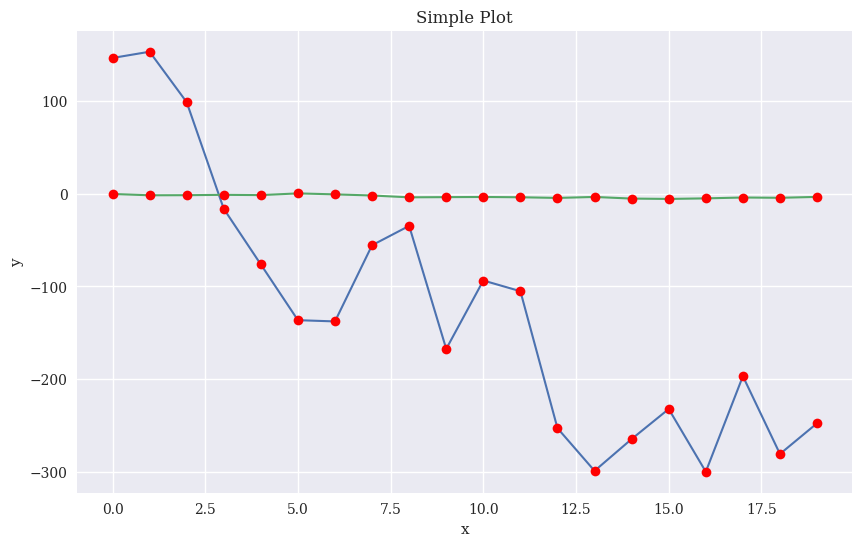

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(y, lw=1.5)
plt.plot(y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Plot')

##### 1.4.1 为多维数据添加图例

为了将每一列分开，我们希望将每一列数据能够分别开，因此要为其添加图例。我们可以使用索引，分别维每个子数据集添加标签：

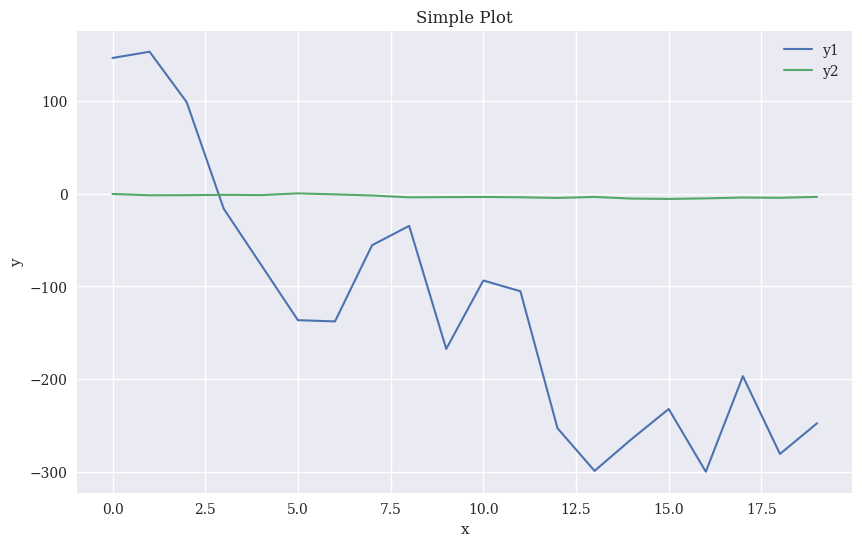

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='y1')
plt.plot(y[:, 1], lw=1.5, label='y2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Plot')
plt.legend()

##### 1.4.2 改变坐标轴的刻度与绘制子图

在上面的可视化中，我们可以发现一个问题，y1与y2的刻度不同，则就导致了两列数据在同一刻度下的坐标轴中会导致可视化信息的显著丢失。y2在视觉上已经接近于一条直线，在某准意义上y2有关的信息“在视觉上已经丢失”，为了解决这个问题，matplotlib为我们提供了两种方案：

1. 使用两个刻度不同的y轴
2. 使用两个子图

我们可以通过显示的定义matplotlib的图与轴对象来实现这两种可视化方法。通过`plt.subplots()`我们可以直接的访问底层的绘图对象，我们可以利用他来操作坐标轴或者生成子图

Text(0, 0.5, 'y2')

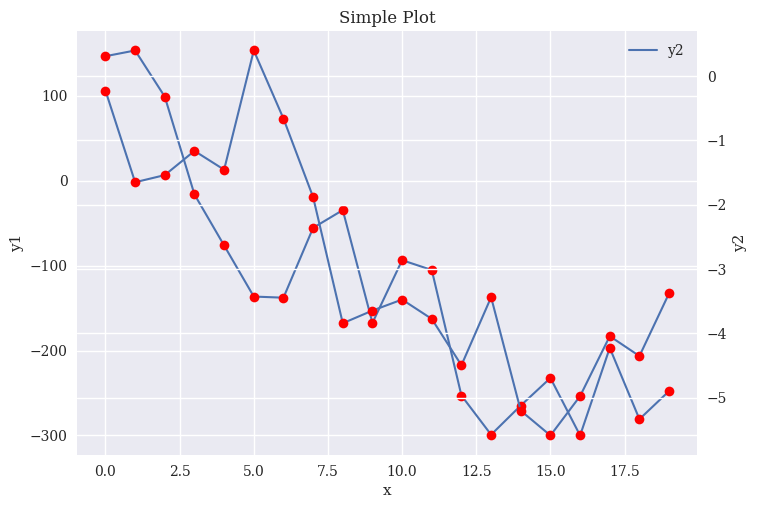

In [19]:
fig, ax1 = plt.subplots()
plt.plot(y[:, 0], lw=1.5, label='y1')
plt.plot(y[:, 0], 'ro', lw=1.5)
plt.xlabel('x')
plt.ylabel('y1')
plt.title('Simple Plot')
ax2 = ax1.twinx()
plt.plot(y[:, 1], lw=1.5, label='y2')
plt.plot(y[:, 1], 'ro', lw=1.5)
plt.legend()
plt.ylabel('y2')

以上的操作可以看成是生成了两个互相重叠的子图，我们接下来考虑单独子图的情况。Matplotlib中对单独子图的定位通过`plt.subplot`来进行，该方法接受三个参数`numrows`、`numcols`、`fignum`，分别指定行数、列数以及子图编号。

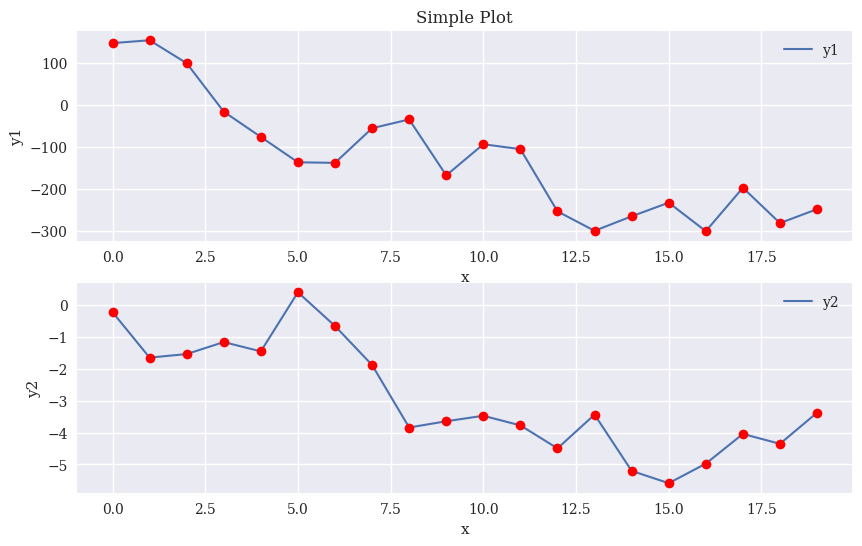

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(y[:, 0], lw=1.5, label='y1')
plt.plot(y[:, 0], 'ro', lw=1.5)
plt.xlabel('x')
plt.ylabel('y1')
plt.legend()
plt.title('Simple Plot')
plt.subplot(212)
plt.plot(y[:, 1], lw=1.5, label='y2')
plt.plot(y[:, 1], 'ro', lw=1.5)
plt.xlabel('x')
plt.ylabel('y2')
plt.legend()

##### 1.4.4 创建不同类型的子图

和上面的操作类似，使用`plt.subplot`我们就可以在一张画布上显示两种不同类型的子图了。

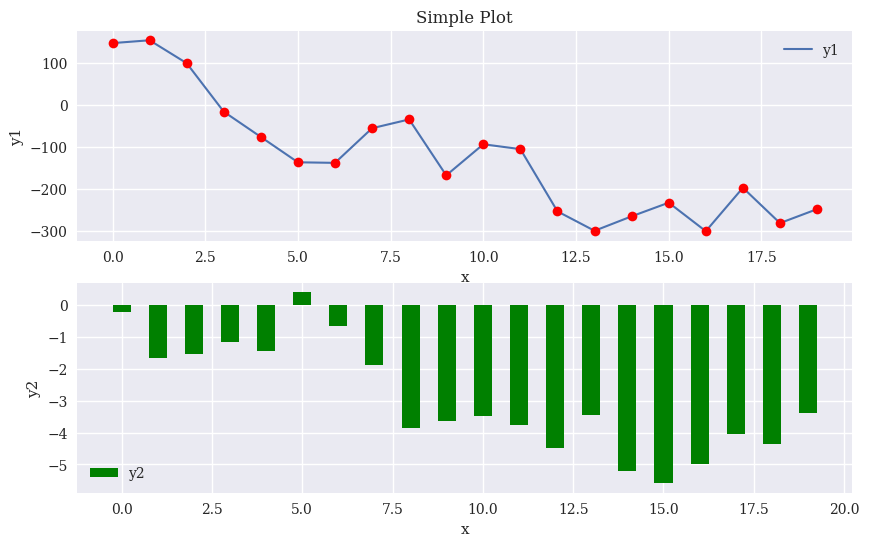

In [21]:
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(y[:, 0], lw=1.5, label='y1')
plt.plot(y[:, 0], 'ro', lw=1.5)
plt.xlabel('x')
plt.ylabel('y1')
plt.legend()
plt.title('Simple Plot')
plt.subplot(212)
plt.bar(np.arange(len(y)),y[:, 1], width=0.5, color='g', label='y2')
plt.xlabel('x')
plt.ylabel('y2')
plt.legend()

### 2. Matplotlib静态3D绘图

在许多领域中，很多图表在3D的空间中才会有一个更直观的数据展现，比如梯度下降或者最优化中的许多函数，他们的目标函数往往是多变量的或者金融学之中的波动率曲面例如欧式看涨期权价值曲面与vega值曲面的可视化，此时我们在一些情况下可以考虑使用三维的绘图方式来进行更直观的数据展示。Matplotlib也为我们提供了三维绘图的接口。接下来我们对matplotlib的三维绘图功能进行一个简单的介绍。

要使用matplotlib进行三维图表的绘制，首先应当导入Matplotlib对应的三维绘图功能

In [22]:
from mpl_toolkits.mplot3d import Axes3D

然后我们创建一个三维的数据集，为试验我们在这里采用人为的生成的一个类似波动率曲面的图表。我们以使用`np.meshgrid`方法来通过两个ndarray对象来生成此类坐标系：

In [25]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)
strike

array([[ 50.        ,  54.34782609,  58.69565217,  63.04347826,
         67.39130435,  71.73913043,  76.08695652,  80.43478261,
         84.7826087 ,  89.13043478,  93.47826087,  97.82608696,
        102.17391304, 106.52173913, 110.86956522, 115.2173913 ,
        119.56521739, 123.91304348, 128.26086957, 132.60869565,
        136.95652174, 141.30434783, 145.65217391, 150.        ],
       [ 50.        ,  54.34782609,  58.69565217,  63.04347826,
         67.39130435,  71.73913043,  76.08695652,  80.43478261,
         84.7826087 ,  89.13043478,  93.47826087,  97.82608696,
        102.17391304, 106.52173913, 110.86956522, 115.2173913 ,
        119.56521739, 123.91304348, 128.26086957, 132.60869565,
        136.95652174, 141.30434783, 145.65217391, 150.        ],
       [ 50.        ,  54.34782609,  58.69565217,  63.04347826,
         67.39130435,  71.73913043,  76.08695652,  80.43478261,
         84.7826087 ,  89.13043478,  93.47826087,  97.82608696,
        102.17391304, 106.52173913, 11

In [26]:
ttm

array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.58695652, 0.58695652, 0.58695652, 0.58695652, 0.58695652,
        0.58695652, 0.58695652, 0.58695652, 0.58695652, 0.58695652,
        0.58695652, 0.58695652, 0.58695652, 0.58695652, 0.58695652,
        0.58695652, 0.58695652, 0.58695652, 0.58695652, 0.58695652,
        0.58695652, 0.58695652, 0.58695652, 0.58695652],
       [0.67391304, 0.67391304, 0.67391304, 0.67391304, 0.67391304,
        0.67391304, 0.67391304, 0.67391304, 0.67391304, 0.67391304,
        0.67391304, 0.67391304, 0.67391304, 0.67391304, 0.67391304,
        0.67391304, 0.67391304, 0.67391304, 0.67391304, 0.67391304,
        0.67391304, 0.67391304, 0.67391304, 0.67391304],
       [0.760

In [27]:
iv = (strike - 100) ** 2 / (100 * strike) / ttm
iv

array([[1.00000000e+00, 7.66956522e-01, 5.81320451e-01, 4.33283358e-01,
        3.15568022e-01, 2.22661397e-01, 1.50310559e-01, 9.51821387e-02,
        5.46265329e-02, 2.65111347e-02, 9.10010111e-03, 9.66183575e-04,
        9.25069380e-04, 7.98580302e-03, 2.13128730e-02, 4.01968827e-02,
        6.40316206e-02, 9.22959573e-02, 1.24539425e-01, 1.60370634e-01,
        1.99447895e-01, 2.41471572e-01, 2.86177807e-01, 3.33333333e-01],
       [8.51851852e-01, 6.53333333e-01, 4.95198903e-01, 3.69093231e-01,
        2.68817204e-01, 1.89674523e-01, 1.28042328e-01, 8.10810811e-02,
        4.65337132e-02, 2.25835592e-02, 7.75193798e-03, 8.23045267e-04,
        7.88022065e-04, 6.80272109e-03, 1.81554103e-02, 3.42417890e-02,
        5.45454545e-02, 7.86224821e-02, 1.06089140e-01, 1.36612022e-01,
        1.69900059e-01, 2.05698006e-01, 2.43781095e-01, 2.83950617e-01],
       [7.41935484e-01, 5.69032258e-01, 4.31302270e-01, 3.21468298e-01,
        2.34131113e-01, 1.65200391e-01, 1.11520737e-01, 7.0619

在进行绘制之前我们首先需要维我们的三维图表创建画布与坐标轴，随后可以通过`plt.plot_surface`方法来绘制曲面，并且可以通过`view_init`方法来从不同的视角进行设置。三维绘图的方式与二维图表的绘制流程大同小异。

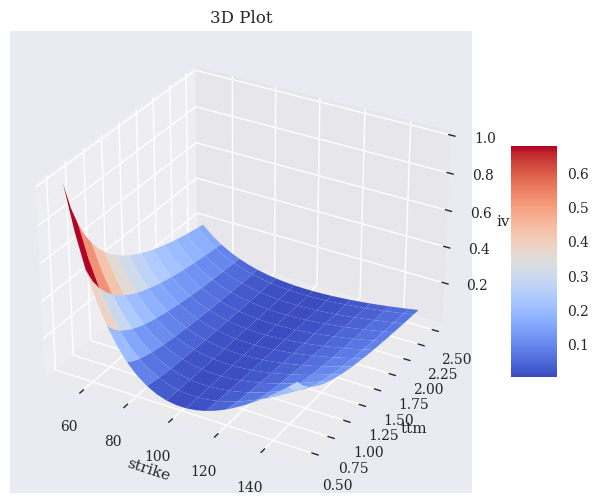

In [30]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(
    X=strike,
    Y=ttm,
    Z=iv,
    rstride=2,
    cstride=2,
    cmap=plt.cm.coolwarm,
    linewidth=0.5,
    antialiased=True,
)
ax.set_title('3D Plot')
ax.set_xlabel('strike')
ax.set_ylabel('ttm')
ax.set_zlabel('iv')
fig.colorbar(surf, shrink=0.5, aspect=5)

与二维图表类似，三维图表中的线样式也可以由散点来表示

Text(0.5, 0, 'iv')

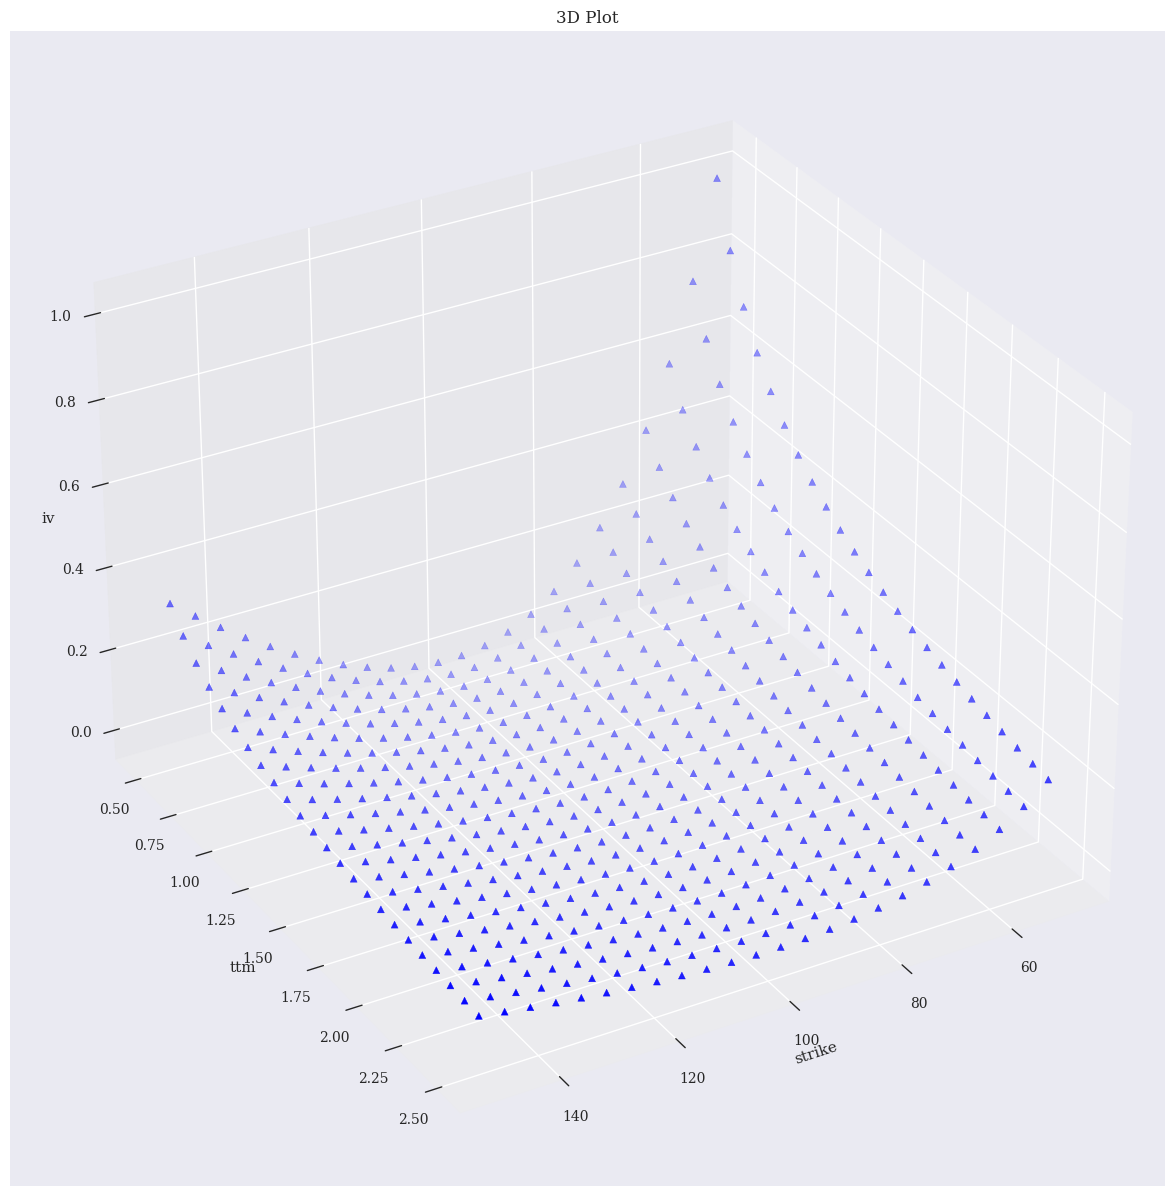

In [32]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(projection = '3d')
ax.view_init(30, 60)
ax.scatter(
    strike,
    ttm,
    iv,
    zdir='z',
    s=25,
    c='b',
    marker='^'
)
ax.set_title('3D Plot')
ax.set_xlabel('strike')
ax.set_ylabel('ttm')
ax.set_zlabel('iv')